# Алиев Тимур РТ5-61Б НИРС


# Описание датасета

В качестве набора данных мы будем использовать набор данных прогнозирования подпишется ли клиент на срочный депозит:
https://www.kaggle.com/datasets/hariharanpavan/bank-marketing-dataset-analysis-classification

Данные связаны с кампаниями прямого маркетинга (телефонными звонками) португальского банковского учреждения. Цель классификации — предсказать, подпишется ли клиент на срочный депозит (переменная y).

- Age Возраст клиента
- Job Работа заказчика
- Martial Семейное положение клиента
- Education Уровень образования клиента
- Default Имеет ли кредит по умолчанию?
- Housing Если у клиента есть жилищный кредит
- Loan Имеет личный кредит
- Balance Индивидуальный баланс клиента
- Contact Тип связи
- Month Последний контактный месяц года
- Day Последний контактный день недели
- Duration Длительность последнего контакта, в секундах
- Campaign Количество контактов, выполненных во время этой кампании и для этого клиента
- Pdays Количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании
- Previous Количество контактов, выполненных до этой кампании и для этого клиента
- Poutcome результат предыдущей маркетинговой кампании
- Y целевой признак (подпишется ли клиент на срочный депозит)

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [2]:
first_data = pd.read_csv('bank-full.csv')

In [3]:
# Удалим дубликаты записей, если они присутствуют
data = first_data.drop_duplicates()

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Основные характеристики датасета

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.shape

(45211, 17)

In [6]:
# Список колонок
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Список колонок с типами данных 
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
# Проверим наличие пустых значений
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Построение графиков для понимания структуры данных

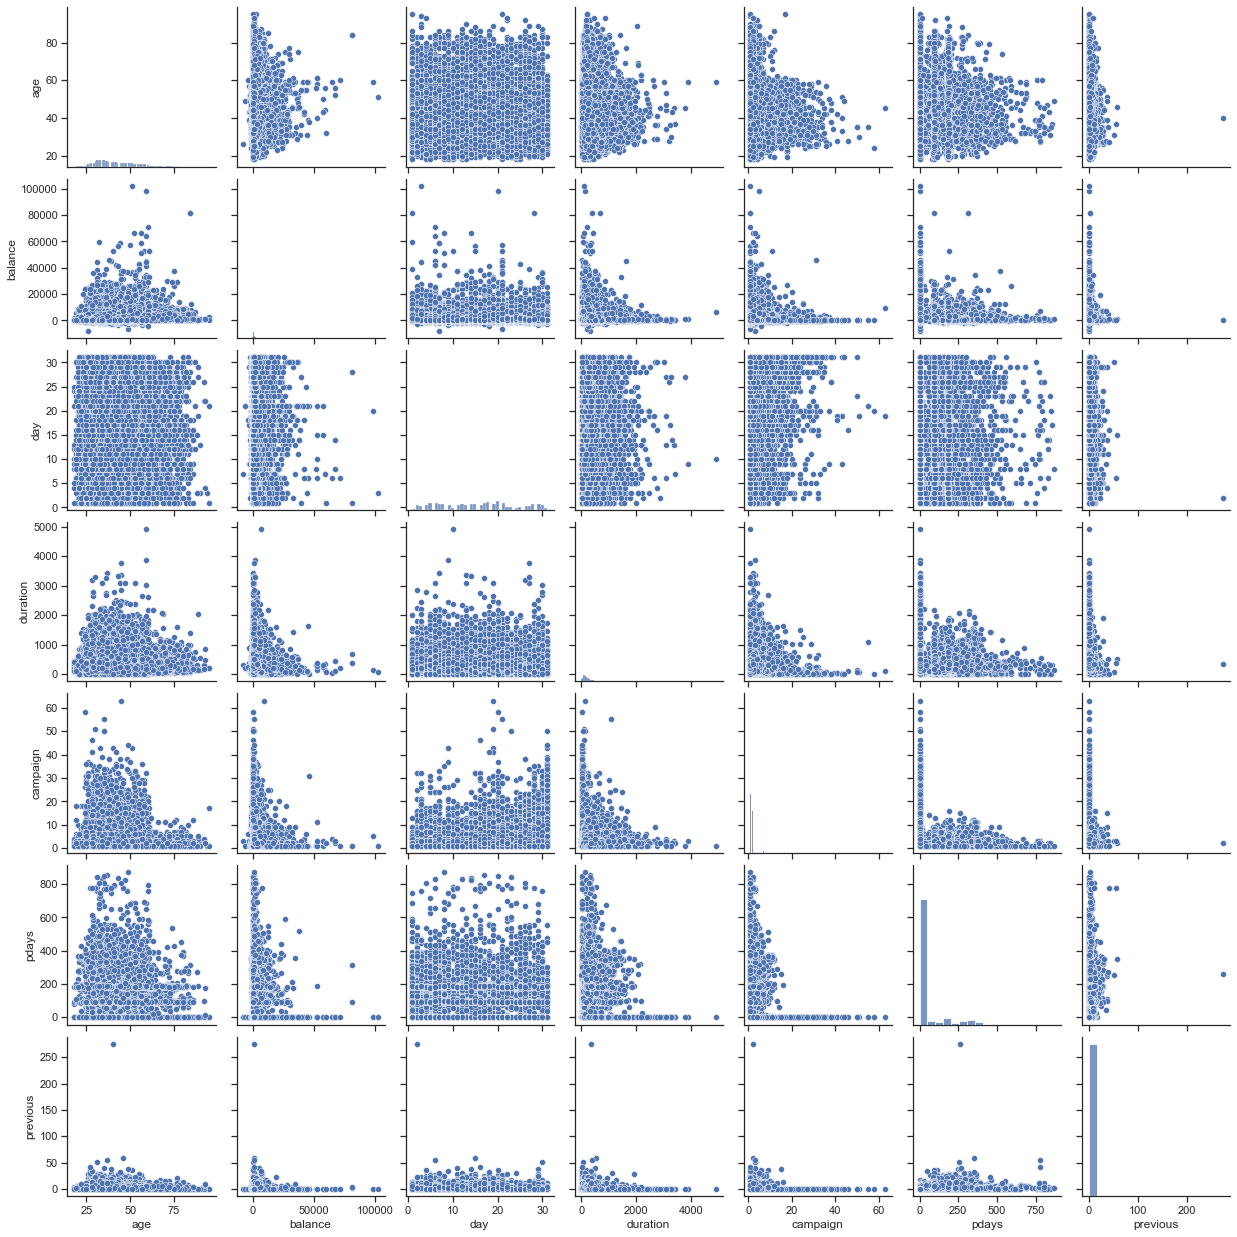

In [9]:
# Парные диаграммы
sns.pairplot(data)

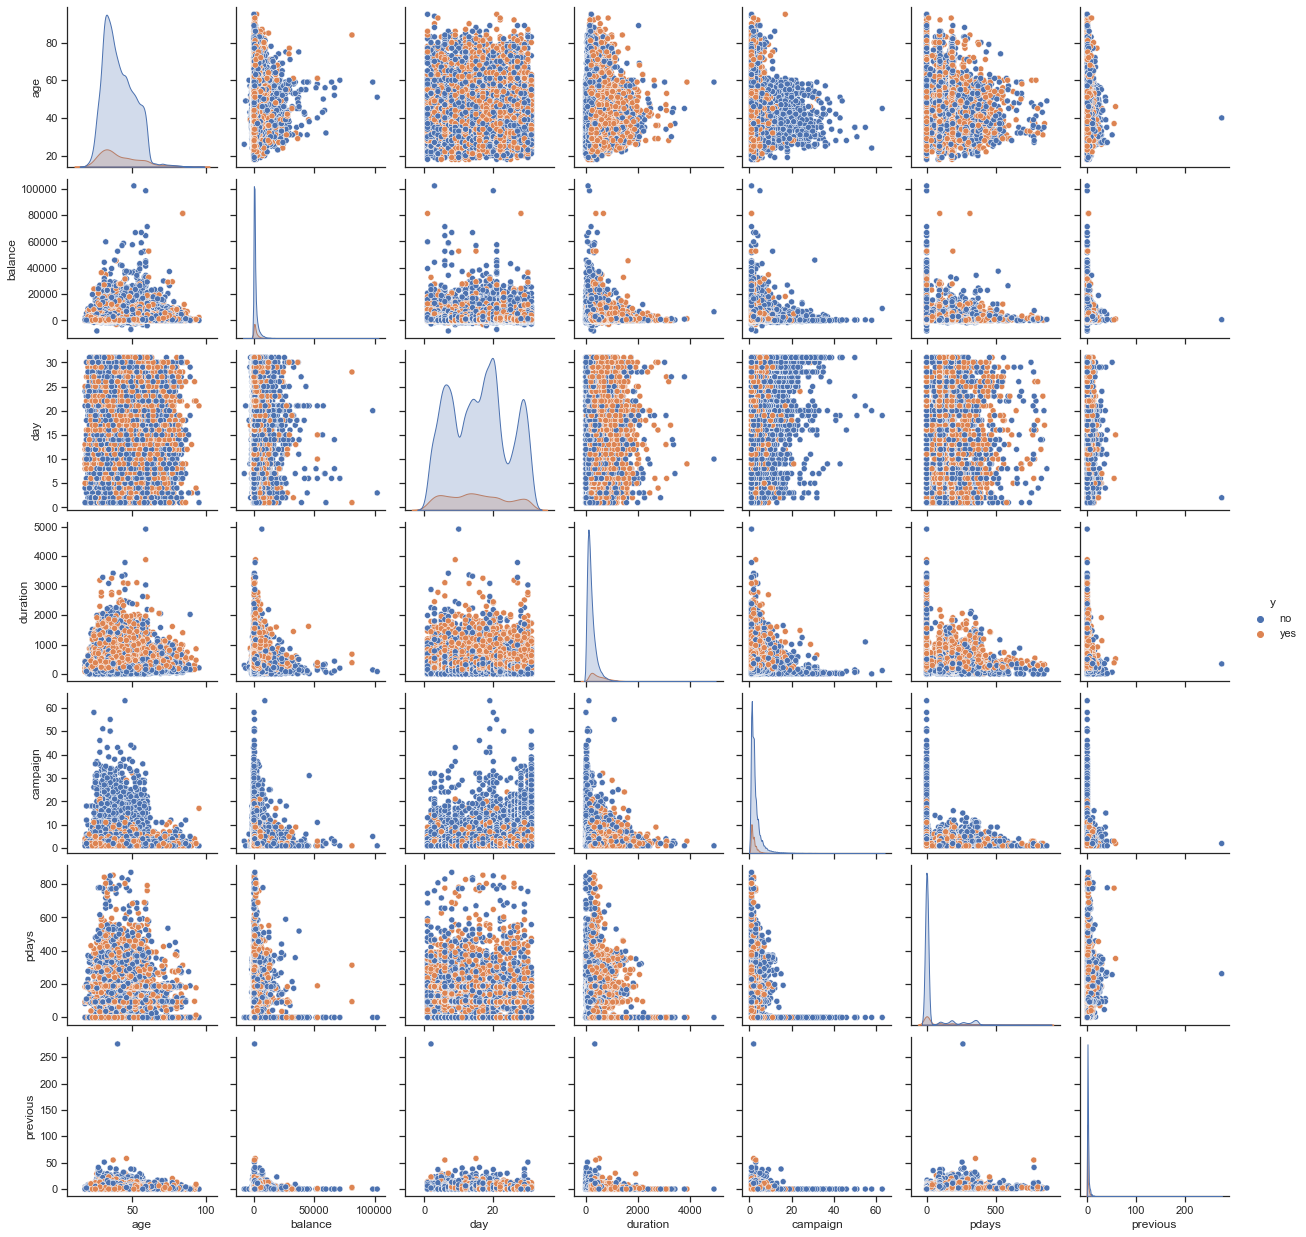

In [10]:
sns.pairplot(data, hue="y")

In [11]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 'no' и 'yes', потом преобразуем к 0 и 1
data['y'].unique()

array(['no', 'yes'], dtype=object)

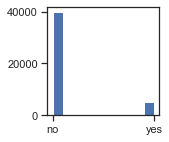

In [12]:
# Оценим дисбаланс классов для stroke
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['y'])
plt.show()

In [13]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [14]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['y'].value_counts()
print('Класс no составляет {}%, а класс yes составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс no составляет 88.3%, а класс yes составляет 11.700000000000001%.


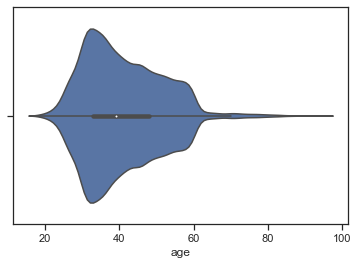

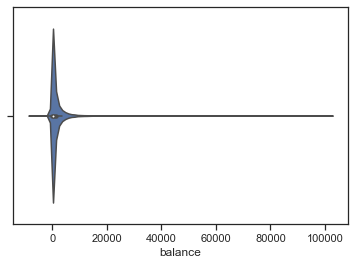

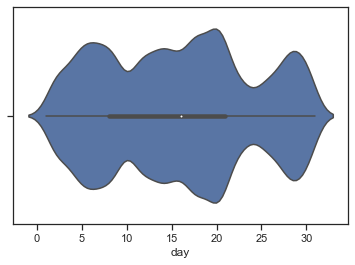

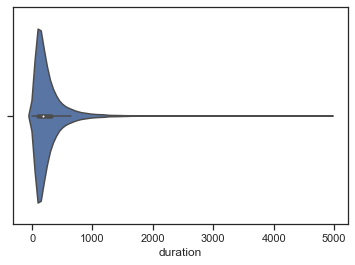

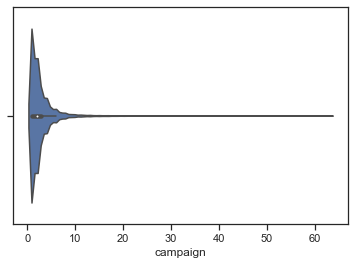

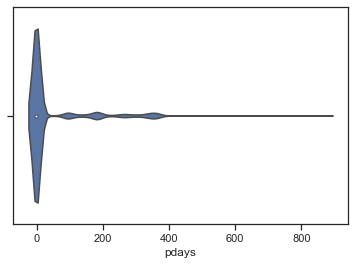

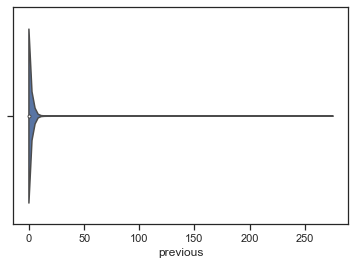

In [15]:
# Скрипичные диаграммы для числовых колонок
for col in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    sns.violinplot(x=data[col])
    plt.show()

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [16]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Категориальные признаки присутствуют, закодируем их.

In [17]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [18]:
job = LabelEncoder()
code_job = job.fit_transform(data["job"])
data["job"] = code_job
data = data.astype({"job":"int64"})
np.unique(code_job)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [19]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
marital = LabelEncoder()
code_marital = marital.fit_transform(data["marital"])
data["marital"] = code_marital
data = data.astype({"marital":"int64"})
np.unique(code_marital)

array([0, 1, 2])

In [21]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [22]:
education = LabelEncoder()
code_education = education.fit_transform(data["education"])
data["education"] = code_education
data = data.astype({"education":"int64"})
np.unique(code_education)

array([0, 1, 2, 3])

In [23]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
default = LabelEncoder()
code_default = default.fit_transform(data["default"])
data["default"] = code_default
data = data.astype({"default":"int64"})
np.unique(code_default)

array([0, 1])

In [25]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [26]:
housing = LabelEncoder()
code_housing = housing.fit_transform(data["housing"])
data["housing"] = code_housing
data = data.astype({"housing":"int64"})
np.unique(code_housing)

array([0, 1])

In [27]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
loan = LabelEncoder()
code_loan = loan.fit_transform(data["loan"])
data["loan"] = code_loan
data = data.astype({"loan":"int64"})
np.unique(code_loan)

array([0, 1])

In [29]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [30]:
contact = LabelEncoder()
code_contact = contact.fit_transform(data["contact"])
data["contact"] = code_contact
data = data.astype({"contact":"int64"})
np.unique(code_contact)

array([0, 1, 2])

In [31]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [32]:
month = LabelEncoder()
code_month = month.fit_transform(data["month"])
data["month"] = code_month
data = data.astype({"month":"int64"})
np.unique(code_month)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [33]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [34]:
poutcome = LabelEncoder()
code_poutcome = poutcome.fit_transform(data["poutcome"])
data["poutcome"] = code_poutcome
data = data.astype({"poutcome":"int64"})
np.unique(code_poutcome)

array([0, 1, 2, 3])

In [35]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
y = LabelEncoder()
code_y = y.fit_transform(data["y"])
data["y"] = code_y
data = data.astype({"y":"int64"})
np.unique(code_y)

array([0, 1])

In [37]:
# Числовые колонки для масштабирования
scale_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [38]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [39]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [40]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,age_scaled,balance_scaled,day_scaled,duration_scaled,campaign_scaled,pdays_scaled,previous_scaled
0,58,4,1,2,0,2143,1,0,2,5,...,0,3,0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0
1,44,9,2,1,0,29,1,0,2,5,...,0,3,0,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0
2,33,2,1,1,0,2,1,1,2,5,...,0,3,0,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0
3,47,1,1,3,0,1506,1,0,2,5,...,0,3,0,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0
4,33,11,2,3,0,1,0,0,2,5,...,0,3,0,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0


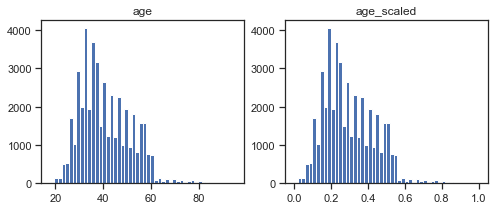

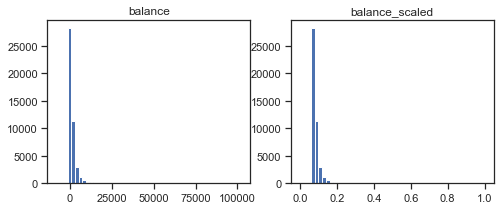

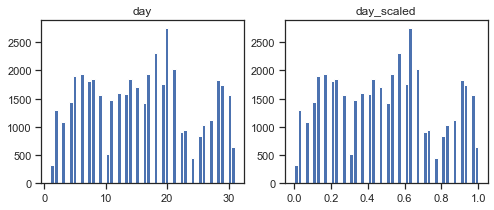

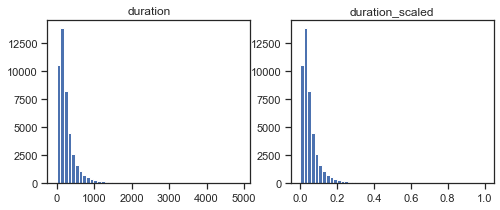

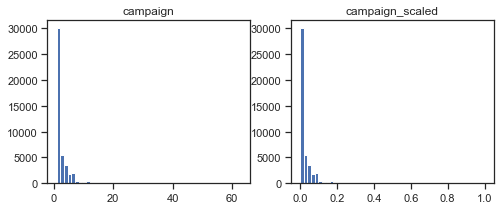

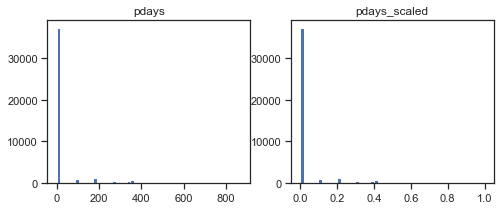

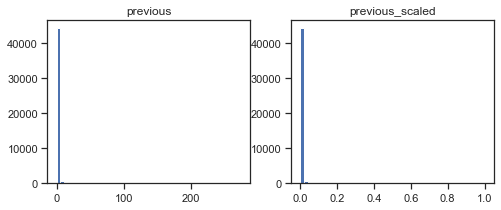

In [41]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [42]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['y']
corr_cols_1

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [43]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['y']
corr_cols_2

['age_scaled',
 'balance_scaled',
 'day_scaled',
 'duration_scaled',
 'campaign_scaled',
 'pdays_scaled',
 'previous_scaled',
 'y']

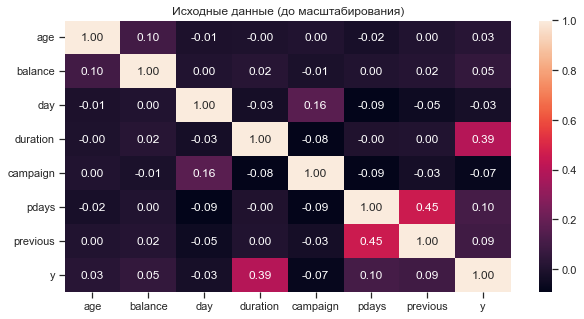

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

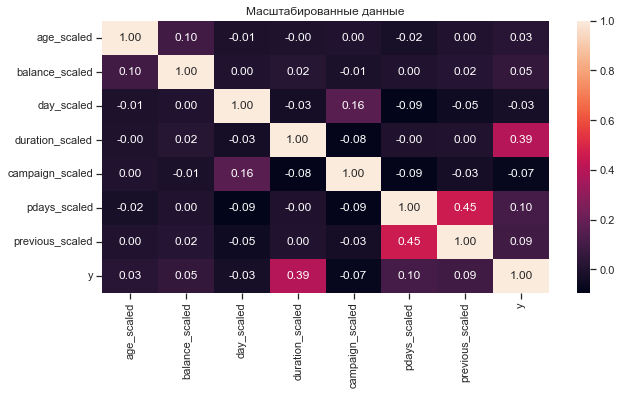

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

Корреляционные матрицы для исходных и масштабированных данных совпадают.

Целевой признак классификации "y" наиболее сильно коррелирует с duration (0.39) и pdays (0.10). Эти признаки обязательно следует оставить в модели классификации.

# Выбор метрик для последующей оценки качества моделей.

В качестве метрик для решения задачи классификации будем использовать:

Метрики, формируемые на основе матрицы ошибок:

Метрика precision: Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Метрика recall (полнота): Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Метрика F1-мера: Для того, чтобы объединить precision и recall в единую метрику используется Fβ-мера, которая вычисляется как среднее гармоническое от precision и recall:

Метрика ROC AUC:

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

# Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [46]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()  

# Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи классификации будем использовать следующие модели:

- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, data.y, random_state=1)

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33908, 24), (33908,), (11303, 24), (11303,))

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [49]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [50]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [51]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [52]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, y_train)
    # Предсказание значений
    Y_pred = model.predict(X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, X_test, y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

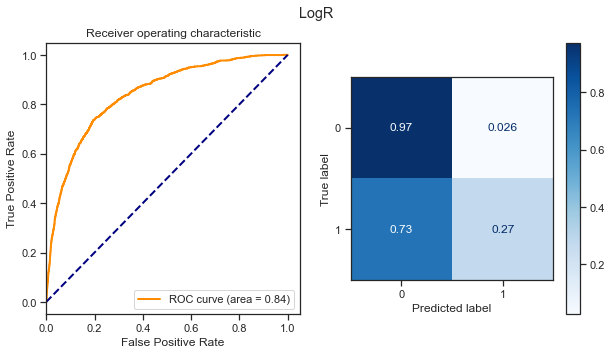

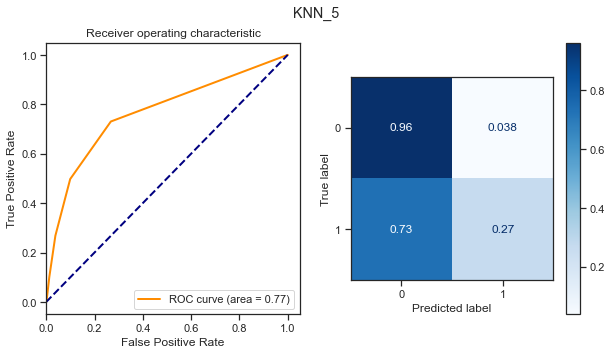

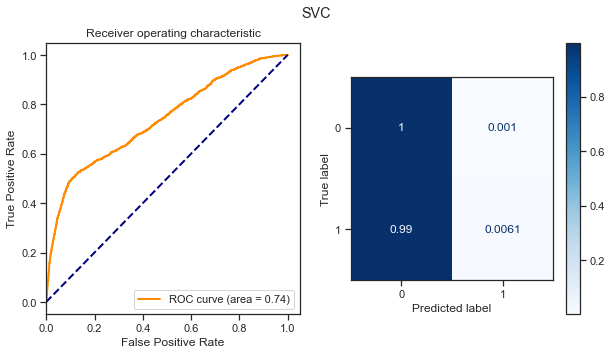

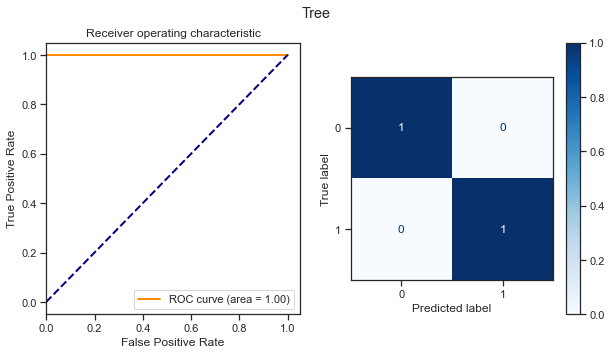

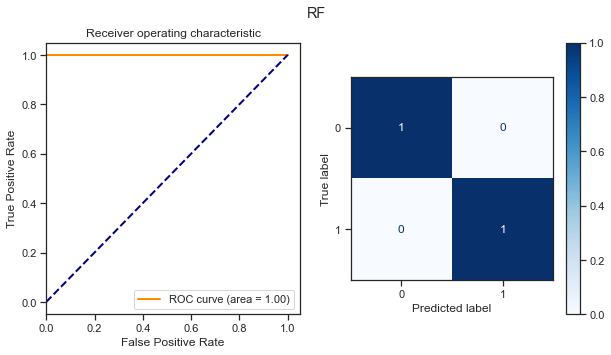

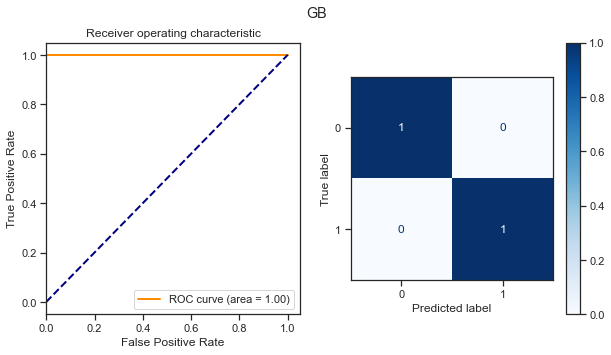

In [53]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

# Подбор гиперпараметров для выбранных моделей.

In [54]:
X_train.shape

(33908, 24)

In [55]:
n_range_list = list(range(0,1250,50))
n_range_list[0] = 1

In [56]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
          550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
         1100, 1150, 1200])}]

In [57]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, y_train)

CPU times: total: 9min 21s
Wall time: 6min 48s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200])}],
             scoring='roc_auc')

In [58]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=100)

In [59]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 100}

In [60]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'100'

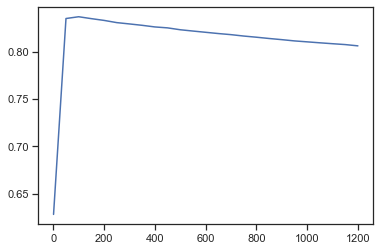

In [61]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

# Сравнение качества полученных моделей с качеством baseline-моделей.

In [62]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

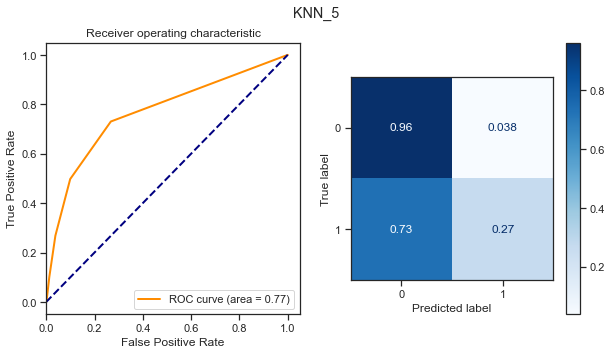

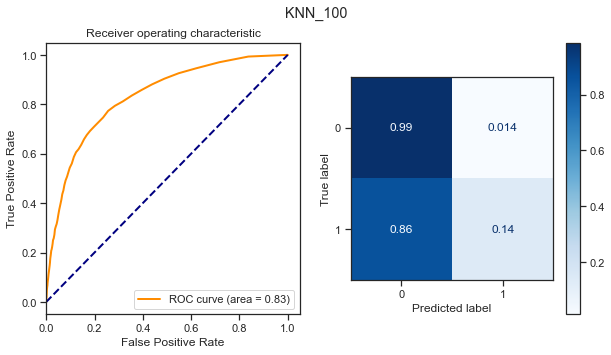

In [63]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

# Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [64]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

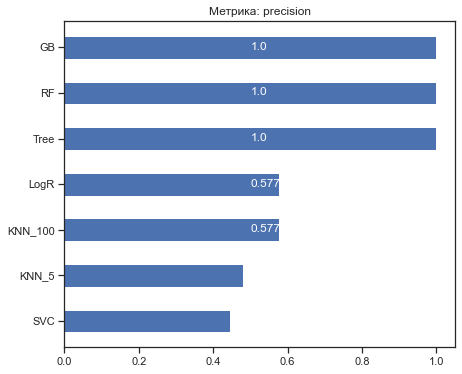

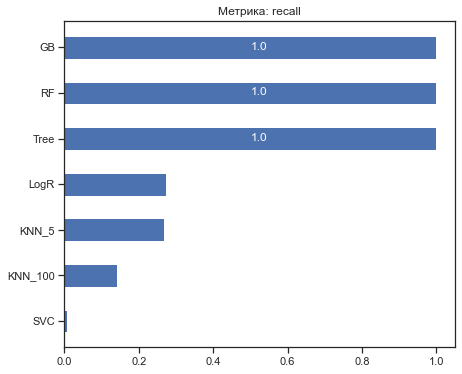

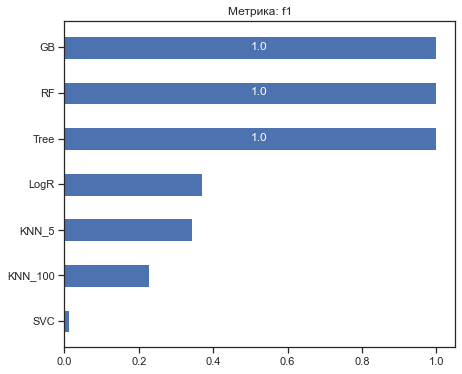

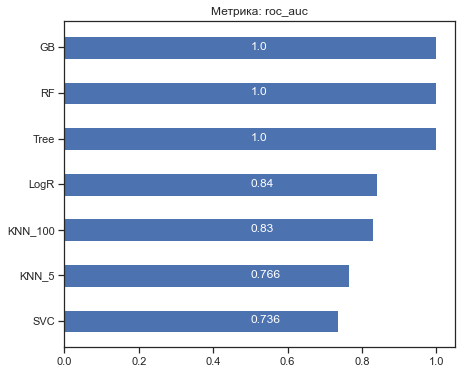

In [65]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Вывод: 3 модели: градиентный бустинг, дерево и случайный лес показали одинаково высокий результат